In [2]:
import pandas as pd

# Load the data from the CSV file
df = pd.read_csv('C:\\Users\\ihsankoo\\Downloads\\Liang_Cleaned.csv')

# Display the first few rows of the dataframe to understand its structure
df.head()

,Date,Well Name,Surface X,Surface Y,Is Injector Well,Oil Production Rate,Water Production Rate,Gas Production Rate,Water Injection Rate,Gas Injection Rate,Bottomhole Pressure,Active Days
0,1/1/2000,P-1,15,5,0,709.09,3.03,0,0.0,0,100,30.5
1,2/1/2000,P-1,15,5,0,1024.24,69.70,0,0.0,0,100,30.5
2,3/1/2000,P-1,15,5,0,957.58,2221.21,0,0.0,0,100,30.5
3,4/1/2000,P-1,15,5,0,481.82,3478.79,0,0.0,0,100,30.5
4,5/1/2000,P-1,15,5,0,448.48,666.67,0,0.0,0,100,30.5


### The dataset contains the following columns:

<mark>Date</mark>: Date of the record.<br><br>
<mark>Well Name</mark>: Name of the well.<br><br>
<mark>Surface X & Surface Y</mark>: Coordinates of the well's surface location. <br><br>
<mark>Is Injector Well</mark>: Binary column indicating if the well is an injector (1) or producer (0).<br><br>
<mark>Oil Production Rate</mark>: Rate of oil production.<br><br>
<mark>Water Production Rate</mark>: Rate of water production.<br><br>
<mark>Gas Production Rate</mark>: Rate of gas production.<br><br>
<mark>Water Injection Rate</mark>: Rate of water injection.<br><br>
<mark>Gas Injection Rate</mark>: Rate of gas injection.<br><br>
<mark>Bottomhole Pressure</mark>: Pressure at the bottom of the well.<br><br>
<mark>Active Days</mark>: Number of days the well was active during the given month.

In [3]:
# Calculate summary statistics for each numeric column
summary_stats = df.describe()

summary_stats


,Surface X,Surface Y,Is Injector Well,Oil Production Rate,Water Production Rate,Gas Production Rate,Water Injection Rate,Gas Injection Rate,Bottomhole Pressure,Active Days
count,900.000000,900.000000,900.000000,900.000000,900.000000,900.0,900.000000,900.0,900.0,900.0
mean,15.000000,15.000000,0.555556,149.423322,466.773378,0.0,619.996956,0.0,100.0,30.5
std,8.169506,8.169506,0.497180,282.914208,868.456068,0.0,671.044539,0.0,0.0,0.0
min,5.000000,5.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,100.0,30.5
25%,5.000000,5.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,100.0,30.5
50%,15.000000,15.000000,1.000000,0.000000,0.000000,0.0,558.860000,0.0,100.0,30.5
75%,25.000000,25.000000,1.000000,164.945000,326.545000,0.0,1114.917500,0.0,100.0,30.5
max,25.000000,25.000000,1.000000,1473.830000,3752.530000,0.0,3541.350000,0.0,100.0,30.5


<hr>

### The summary statistics for the numeric columns are as follows:

<mark>Surface X & Y</mark>: These represent the coordinates of the well. They range from 5 to 25, with a mean of 15.<br><br>
<mark>Is Injector Well</mark>: About 55.6% of the records represent injector wells.<br><br>
<mark>Oil Production Rate</mark>: The average oil production rate is approximately 149.42, with a maximum value of 1473.83.<br><br>
<mark>Water Production Rate</mark>: The average water production rate is around 466.77, peaking at 3752.53.<br><br>
<mark>Gas Production Rate</mark>: Interestingly, the gas production rate is zero for all records.<br><br>
<mark>Water Injection Rate</mark>: The average rate is about 620, with a maximum of 3541.35.<br><br>
<mark>Gas Injection Rate</mark>: Similar to the gas production rate, the gas injection rate is zero for all records.<br><br>
<mark>Bottomhole Pressure</mark>: All records have a consistent value of 100.<br><br>
<mark>Active Days</mark>: All records have a consistent value of 30.5.

<hr>

In [4]:
# Determine the number of injector vs. producer wells
well_counts = df.groupby('Is Injector Well')['Well Name'].nunique()

injector_count = well_counts.get(1, 0)
producer_count = well_counts.get(0, 0)

injector_count, producer_count


(5, 4)

<b> There are 5 injector wells and 4 producer wells </b>

In [5]:
# Check for duplicate date values for each well
duplicates = df[df.duplicated(subset=['Date', 'Well Name'], keep=False)].sort_values(by=['Well Name', 'Date'])

duplicates_count = duplicates.shape[0]
duplicates_count, duplicates.head(10)  # Displaying the first 10 rows of duplicates for inspection


(0,
 Empty DataFrame
 Columns: [Date, Well Name, Surface X, Surface Y, Is Injector Well, Oil Production Rate, Water Production Rate, Gas Production Rate, Water Injection Rate, Gas Injection Rate, Bottomhole Pressure, Active Days]
 Index: [])

<b> There are no duplicate date-time values for each well in the dataset. </b>

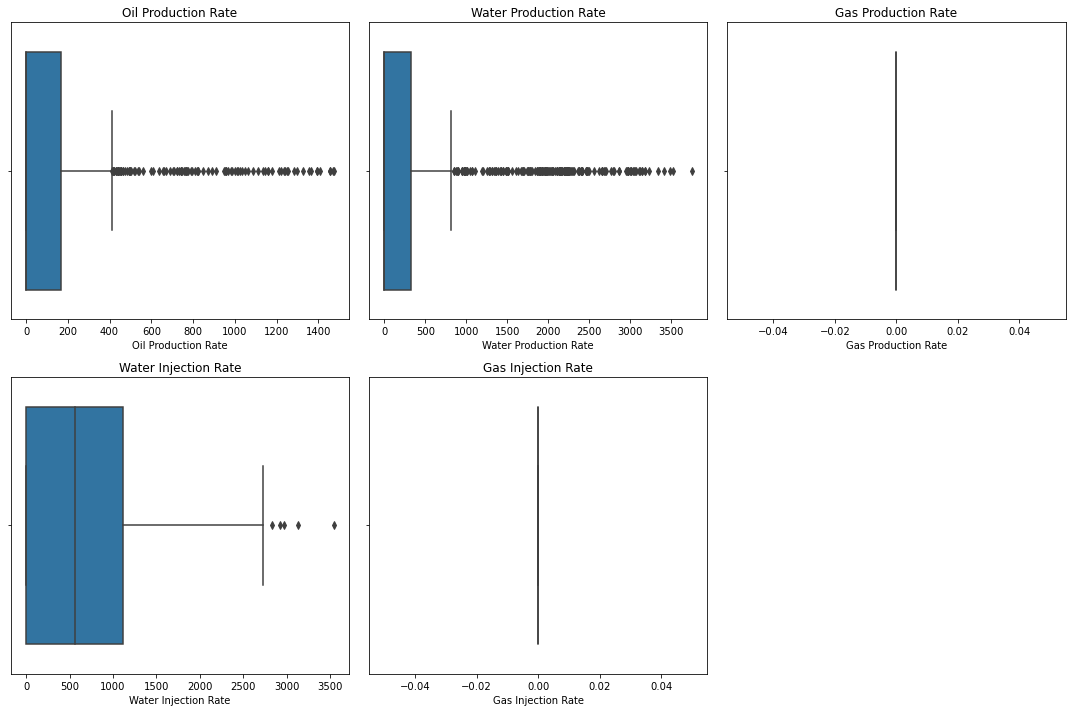

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the matplotlib figure
plt.figure(figsize=(15, 10))

# Plotting boxplots for the production and injection rate columns
columns_to_plot = ['Oil Production Rate', 'Water Production Rate', 'Gas Production Rate', 
                   'Water Injection Rate', 'Gas Injection Rate']

for i, col in enumerate(columns_to_plot, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=df[col])
    plt.title(col)

plt.tight_layout()
plt.show()


<hr>

### From the boxplots, we can make the following observations:

<b>Oil Production Rate</b>: A significant number of wells have zero oil production, but there are also many outliers on the higher side.<br><br>
<b>Water Production Rate</b>: A large number of wells have zero water production. There's a right-skew with outliers on the higher side.<br><br>
<b>Gas Production Rate</b>: All wells have a zero gas production rate, indicating no variability.<br><br>
<b>Water Injection Rate</b>: There's a right-skew with many wells having zero injection rates, but some outliers have high rates.<br><br>
<b>Gas Injection Rate</b>: All wells have a zero gas injection rate, indicating no variability.<br><br>
Given that there are no duplicates, we don't need to aggregate the data. However, the presence of outliers and skewness will be essential to consider during time series analysis and other modeling activities.

<hr>

# Time Series Analysis
In order to analyze trends in oil, water, and gas production over time and detect any seasonality or cyclic behavior in production or injection rates, I'll visualize the data first.

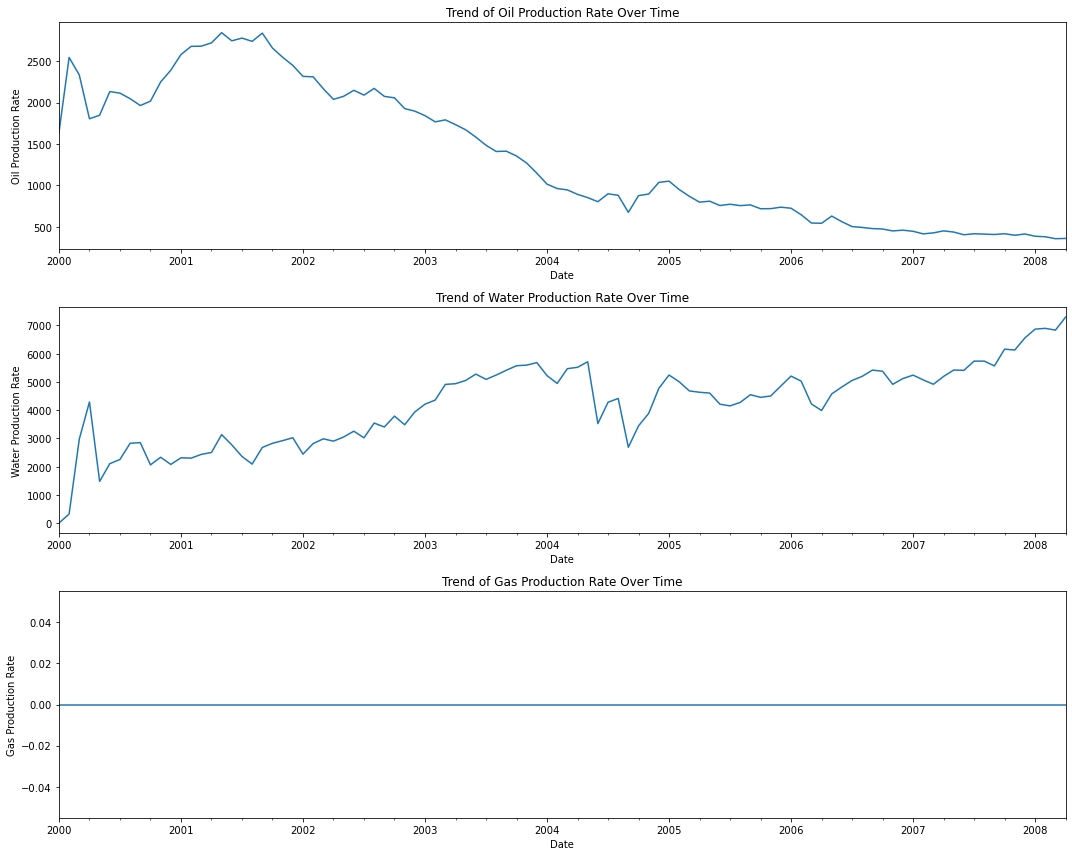

In [7]:
# Convert 'Date' column to datetime format for proper plotting
df['Date'] = pd.to_datetime(df['Date'])

# Set up the matplotlib figure
plt.figure(figsize=(15, 12))

# Plotting time series for the production columns
for i, col in enumerate(['Oil Production Rate', 'Water Production Rate', 'Gas Production Rate'], 1):
    plt.subplot(3, 1, i)
    
    # Grouping by date and summing the production rates to get total production for each date
    df.groupby('Date')[col].sum().plot()
    plt.title(f'Trend of {col} Over Time')
    plt.ylabel(col)
    plt.xlabel('Date')

plt.tight_layout()
plt.show()


<hr>

### From the time series plots, we can observe the following:

<b>Oil Production Rate</b>: There's a clear trend where oil production starts high but declines over time. This is typical for oil wells as they deplete.<br><br>
<b>Water Production Rate</b>: The water production rate shows an increasing trend over time, which might be indicative of water breakthrough in the reservoir. As oil gets produced, it's often replaced by water, leading to an increase in water production.<br><br>
<b>Gas Production Rate</b>: As observed earlier, the gas production rate is consistently zero throughout the dataset.

<hr>

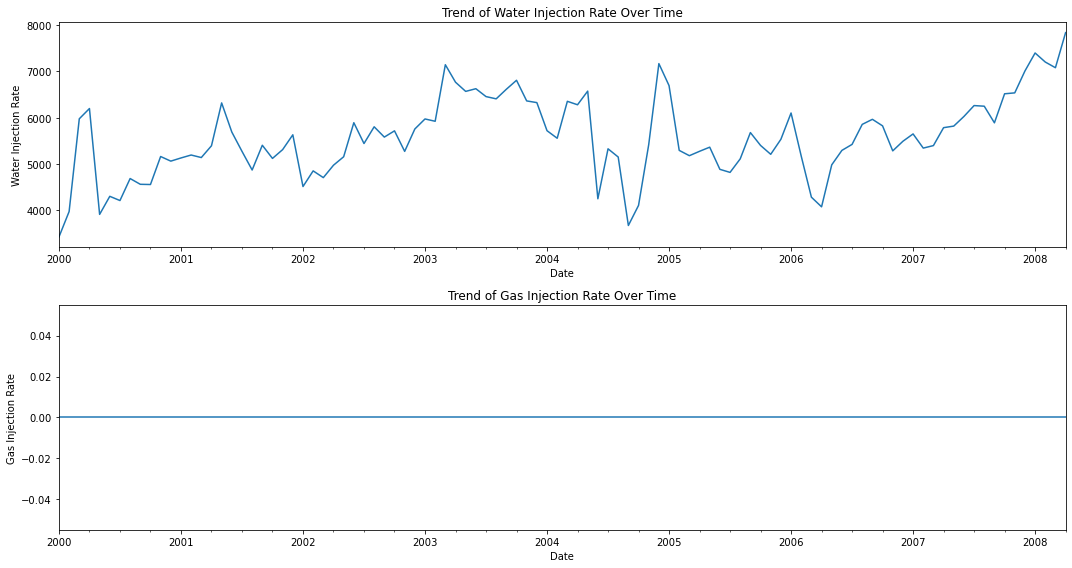

In [8]:
# Set up the matplotlib figure
plt.figure(figsize=(15, 8))

# Plotting time series for the injection columns
for i, col in enumerate(['Water Injection Rate', 'Gas Injection Rate'], 1):
    plt.subplot(2, 1, i)
    
    # Grouping by date and summing the injection rates to get total injection for each date
    df.groupby('Date')[col].sum().plot()
    plt.title(f'Trend of {col} Over Time')
    plt.ylabel(col)
    plt.xlabel('Date')

plt.tight_layout()
plt.show()


<hr>

### From the injection time series plots, we can make the following observations:
<b>Water Injection Rate</b>: There's a clear cyclic behavior in water injection rates. The rate seems to be oscillating with an increasing trend initially and then stabilizing.<br><br>
<b>Gas Injection Rate</b>: As noted earlier, the gas injection rate is consistently zero throughout the dataset.<br><br>
The cyclic behavior in water injection might be due to operational practices, maintenance schedules, or reservoir management strategies.

<hr>

<Figure size 1728x1296 with 0 Axes>

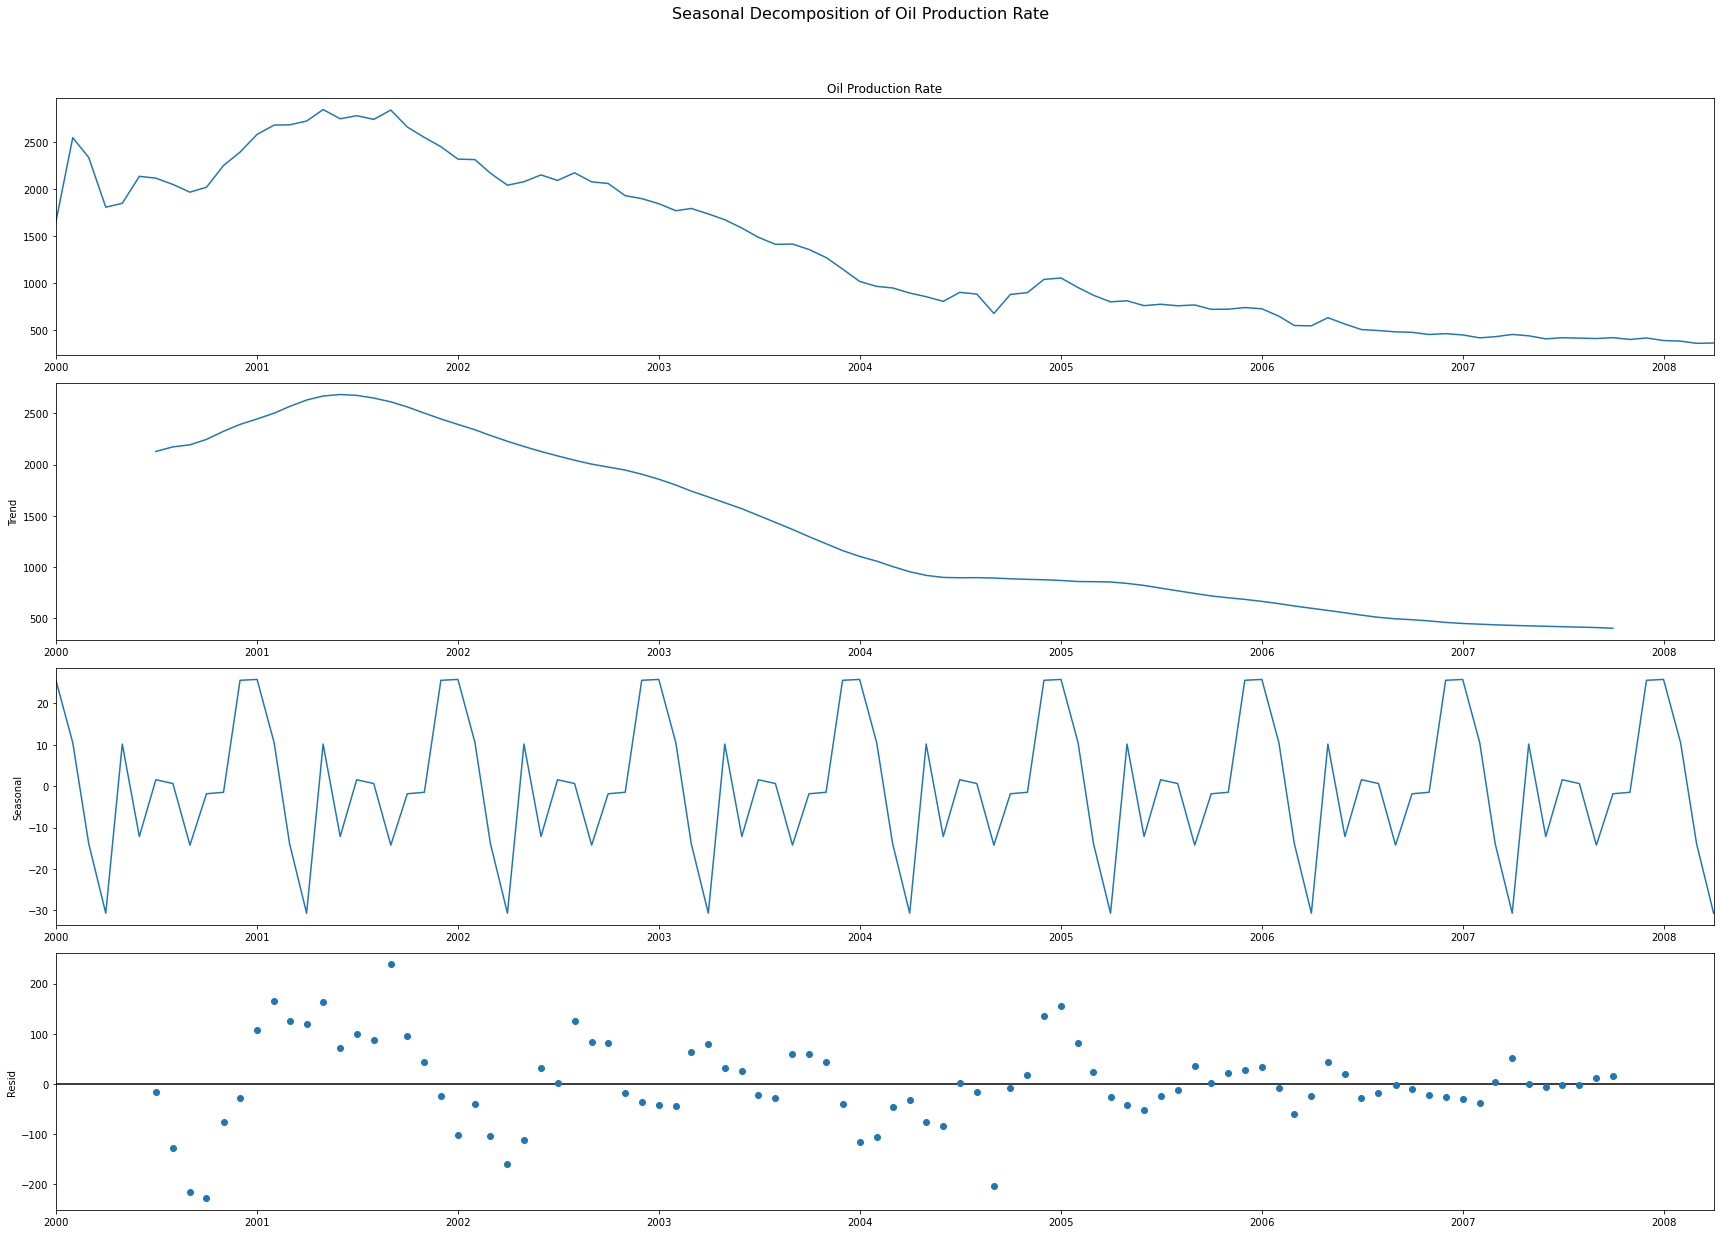

In [16]:
from statsmodels.tsa.seasonal import seasonal_decompose
plt.figure(figsize=(24, 18))
df['Date'] = pd.to_datetime(df['Date'])
df_ts = df.set_index('Date')

# Adjusting the figure size for the seasonal decomposition plots


# Perform seasonal decomposition for Oil Production Rate
result_oil = seasonal_decompose(df_ts.groupby('Date')['Oil Production Rate'].sum(), model='additive', period=12)
result_oil_plot = result_oil.plot()

# Adjusting the figure size directly for the seasonal decomposition plots
fig = result_oil_plot.suptitle('Seasonal Decomposition of Oil Production Rate', fontsize=16)
result_oil_plot.set_size_inches(24, 18)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

### The seasonal decomposition for the Oil Production Rate reveals the following components:

<b>Trend</b>: This represents the underlying trend in the data. The trend component shows that oil production starts high and then declines over time.<br><br>
<b>Seasonal</b>: This captures periodic fluctuations in the data. There seems to be a recurring pattern every year, suggesting a yearly seasonality in oil production rates.<br><br>
<b>Residual</b>: This represents the error or noise in the data after removing the trend and seasonal components.<br><br>
The observed data is the combination of these three components. The decomposition provides a clearer view of the underlying patterns in the data, which can be useful for forecasting and understanding the behavior of the wells.
